In [14]:
import torch
import torch.nn as nn
import torch.optim as optim

In [15]:
import numpy as np

In [16]:
import sys
sys.path.append('..')

from my_code import functions as f

# Data

In [17]:
file_path = '../data/energies/Trial/Strings_Energies.txt'  # Replace with the actual path to your 'data.txt' file
string_list, number_list = f.read_data_file(file_path)
score_list = np.array(number_list)/100
angles_list = np.array([f.string_to_numbers(string) for string in string_list])

In [18]:
X, Y, X_validation, Y_validation = f.create_validating_set(angles_list, score_list, percentage=0.1)

In [19]:
# Define the dataset
input_data = torch.tensor(X, dtype=torch.float32)
target_data = torch.tensor(Y, dtype=torch.float32).view(-1, 1)

# Define the validation set
input_validation = torch.tensor(X_validation, dtype=torch.float32)
target_validation = torch.tensor(Y_validation, dtype=torch.float32).view(-1, 1)

# Classical model

In [20]:
input_dim = input_data.size(1)

layers = [nn.Linear(input_dim, 64), nn.ReLU()] + [nn.Linear(64, 64), nn.ReLU()]*3 + [nn.Linear(64, 32), nn.ReLU(), nn.Linear(32, 16), nn.ReLU(), nn.Linear(16, 1)]
Net = nn.Sequential(*layers)

In [21]:
# # Define the neural network architecture
# class Net(nn.Module):
#     def __init__(self, input_dim):
#         super(Net, self).__init__()
#         self.fc1 = nn.Linear(input_dim, 64)
#         self.fc2 = nn.Linear(64, 64)
#         self.fc3 = nn.Linear(64, 64)
#         self.fc4 = nn.Linear(64, 64)
#         self.fc5 = nn.Linear(64, 64)
#         self.fc6 = nn.Linear(64, 32)
#         self.fc7 = nn.Linear(32, 1)

#     def forward(self, x):
#         x = torch.relu(self.fc1(x))
#         x = torch.relu(self.fc2(x))
#         x = torch.relu(self.fc3(x))
#         x = torch.relu(self.fc4(x))
#         x = torch.relu(self.fc5(x))
#         x = torch.relu(self.fc6(x))
#         x = self.fc7(x)
#         return x

In [22]:
# Create an instance of the network
model = Net

In [23]:
# from torchsummary import summary
# #draw the model
# summary(model, (input_dim,))

In [24]:
# Define the loss function and optimizer
criterion = nn.MSELoss()  # Mean Squared Error loss
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer with learning rate 0.001

# Training loop
num_epochs = 100
batch_size = 32

losses = []

for epoch in range(num_epochs):
    # Shuffle the dataset
    indices = torch.randperm(input_data.size(0))
    input_data = input_data[indices]
    target_data = target_data[indices]

    # Mini-batch training
    for i in range(0, input_data.size(0), batch_size):
        inputs = input_data[i:i+batch_size]
        targets = target_data[i:i+batch_size]

        # Forward pass
        outputs = model(inputs)

        # Compute the loss
        loss = criterion(outputs, targets)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Store the loss
        losses.append(loss.item())

    # Print the loss for this epoch
    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))


Epoch [1/100], Loss: 7.2988
Epoch [2/100], Loss: 2.4605
Epoch [3/100], Loss: 4.0798
Epoch [4/100], Loss: 5.8646
Epoch [5/100], Loss: 2.1992
Epoch [6/100], Loss: 4.2412


Epoch [7/100], Loss: 26.7886
Epoch [8/100], Loss: 13.0324
Epoch [9/100], Loss: 4.5915
Epoch [10/100], Loss: 8.2882
Epoch [11/100], Loss: 15.6879
Epoch [12/100], Loss: 7.5019
Epoch [13/100], Loss: 13.3567
Epoch [14/100], Loss: 5.4846
Epoch [15/100], Loss: 3.5081
Epoch [16/100], Loss: 0.7337
Epoch [17/100], Loss: 12.7407
Epoch [18/100], Loss: 5.0633
Epoch [19/100], Loss: 6.7929
Epoch [20/100], Loss: 4.1603
Epoch [21/100], Loss: 2.5776
Epoch [22/100], Loss: 11.7764
Epoch [23/100], Loss: 5.9889
Epoch [24/100], Loss: 8.4336
Epoch [25/100], Loss: 10.5256
Epoch [26/100], Loss: 3.9967
Epoch [27/100], Loss: 7.7103
Epoch [28/100], Loss: 1.3314
Epoch [29/100], Loss: 5.0096
Epoch [30/100], Loss: 2.2306
Epoch [31/100], Loss: 12.9210
Epoch [32/100], Loss: 3.9397
Epoch [33/100], Loss: 6.0291
Epoch [34/100], Loss: 4.0572
Epoch [35/100], Loss: 4.1443
Epoch [36/100], Loss: 1.3416
Epoch [37/100], Loss: 3.2432
Epoch [38/100], Loss: 1.6930
Epoch [39/100], Loss: 5.7518
Epoch [40/100], Loss: 1.1705
Epoch [41

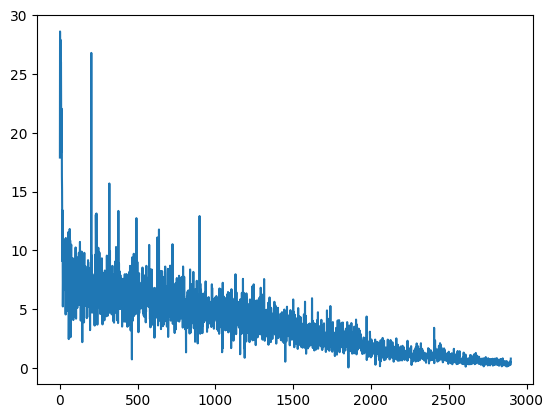

In [25]:
#plot the loss
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [26]:
# try to predict score of a input vector
input_vector = input_data[25]
target = target_data[25]
output = model(input_vector)
print('Input vector: {}'.format(input_vector))
print('Target: {}'.format(target))
print('Output: {}'.format(output))
print('Loss: {}'.format(criterion(output, target)))


Input vector: tensor([ 8.,  8.,  4., 17., 10.,  8., 14., 17.,  7.,  8.,  1., 16.])
Target: tensor([2.1944])
Output: tensor([1.7703], grad_fn=<AddBackward0>)
Loss: 0.17983627319335938


In [27]:
for x, (i, t) in enumerate(zip((input_validation), target_validation)):
    print('i: {}, target: {:.3f}, output: {:.3f}, loss: {:.3f}'.format(x, t.item(), model(i).item(), criterion(model(i), t)))
    print('')

i: 0, target: 9.893, output: 2.471, loss: 55.076

i: 1, target: 5.435, output: 2.988, loss: 5.991

i: 2, target: 0.783, output: 4.531, loss: 14.045

i: 3, target: 1.235, output: 0.846, loss: 0.152

i: 4, target: 1.874, output: 5.050, loss: 10.085

i: 5, target: 7.860, output: -0.775, loss: 74.557

i: 6, target: 5.790, output: 7.812, loss: 4.091

i: 7, target: 4.322, output: 4.708, loss: 0.149

i: 8, target: 4.329, output: 9.844, loss: 30.406

i: 9, target: 7.716, output: 4.387, loss: 11.081

i: 10, target: 3.405, output: 2.255, loss: 1.323

i: 11, target: -0.502, output: 4.134, loss: 21.494

i: 12, target: 1.077, output: -0.403, loss: 2.189

i: 13, target: 3.705, output: 5.007, loss: 1.697

i: 14, target: 1.932, output: 6.028, loss: 16.776

i: 15, target: 2.903, output: 7.514, loss: 21.260

i: 16, target: 5.507, output: 5.298, loss: 0.044

i: 17, target: 3.952, output: 1.712, loss: 5.018

i: 18, target: 3.888, output: 2.072, loss: 3.297

i: 19, target: 6.623, output: 9.711, loss: 9.536